<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X109_DE_time', 'X109_FE_time', 'X109RPM'])


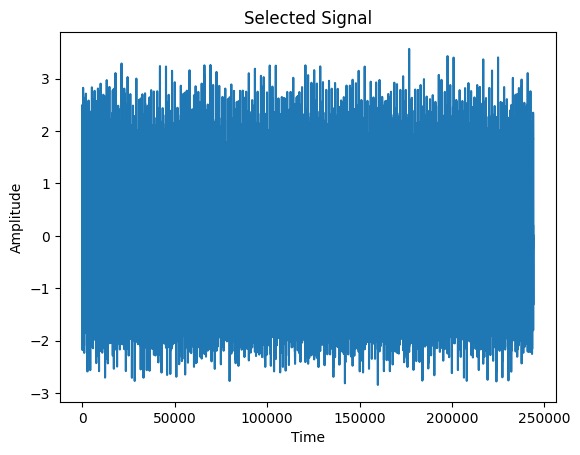

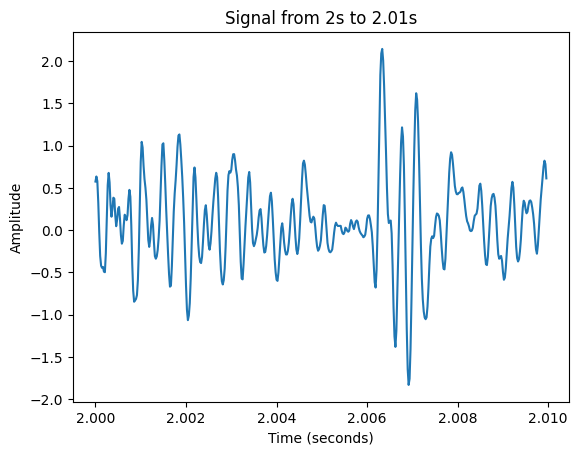

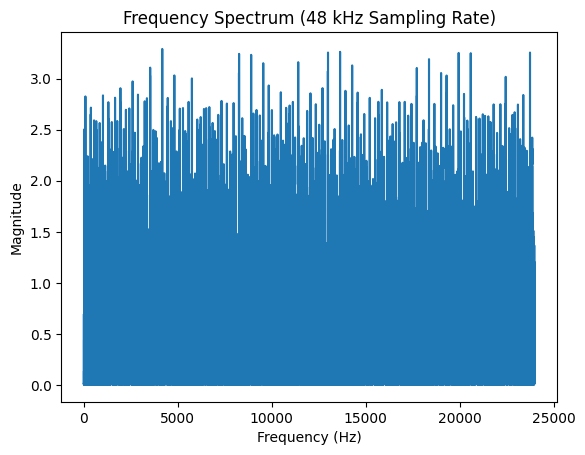

Dominant Frequency: 4174.700128721232 Hz


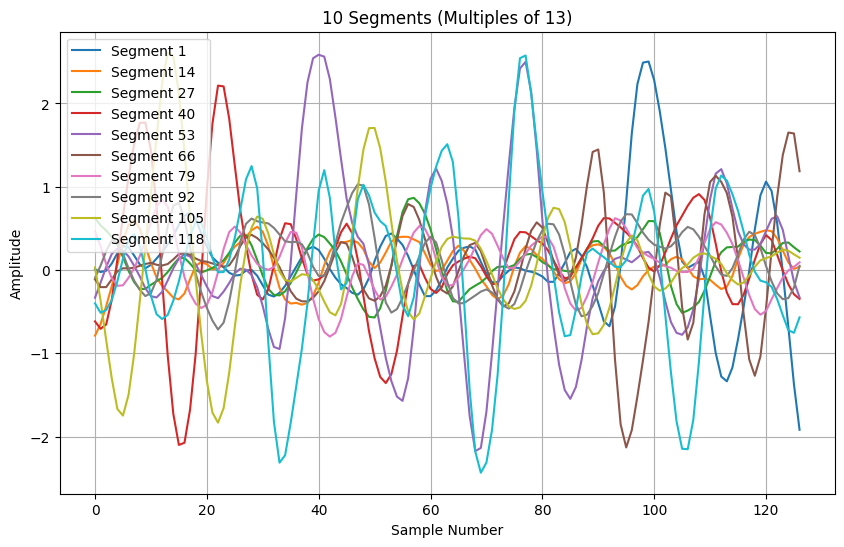

In [ ]:
#Mini_project0_section1
#Mohammad Sefid 40206864
#Erfan Majidi 40211034
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft
import math

# 3.1_A
data = scipy.io.loadmat('109.mat')
print(type(data))
print(data.keys())
selected_signal = data['X109_DE_time']
plt.plot(selected_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Selected Signal')
plt.show()

# 3.1_B
start_index = 2 * 48000
end_index = 2.01 * 48000
end_index = int(end_index)
time = np.arange(start_index, end_index) / 48000
plt.plot(time, selected_signal[start_index:end_index])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Signal from 2s to 2.01s')
plt.show()

# 3.1_C
def compute_fft(signal, sampling_rate=48000):
    n = len(signal)
    fft_result = fft(signal)
    freq = np.fft.fftfreq(n, d=1/sampling_rate)
    return freq[:n//2], np.abs(fft_result[:n//2])
freq, magnitude = compute_fft(selected_signal, sampling_rate=48000)
plt.plot(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum (48 kHz Sampling Rate)')
plt.show()
dominant_freq = freq[np.argmax(magnitude)]
print(f'Dominant Frequency: {dominant_freq} Hz')

# 3.1_D
def segment_signal(signal, segment_size, overlap):
    step = segment_size - overlap
    segments = [signal[i:i + segment_size] for i in range(0, len(signal) - segment_size + 1, step)]
    return np.array(segments)
segment_size = 128
overlap = 64
segments = segment_signal(selected_signal, segment_size, overlap)

# 3.1_E
segments_2d = segments.reshape(segments.shape[0], segments.shape[1])
df_segments = pd.DataFrame(segments_2d)
selected_segments = df_segments.iloc[::13][:10]
plt.figure(figsize=(10, 6))

for i, (index, row) in enumerate(selected_segments.iterrows()):
    plt.plot(row[:-1], label=f'Segment {index + 1}')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title('10 Segments (Multiples of 13)')
plt.legend()
plt.grid(True)
plt.show()

# 3.1_F
def calculate_statistics(signal):
    mean = sum(signal) / len(signal)
    variance = sum((x - mean) ** 2 for x in signal) / len(signal)
    std_dev = math.sqrt(variance)
    rms = math.sqrt(sum(x ** 2 for x in signal) / len(signal))
    return mean, std_dev, rms

features = []
for index, row in selected_segments.iterrows():
    mean, std_dev, rms = calculate_statistics(row)
    features.append([mean, std_dev, rms])
df_features = pd.DataFrame(features, columns=['Mean', 'Standard Deviation', 'RMS'])
df_features.to_csv('features.csv', index=False)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
81                 5.5               2.4                3.7               1.0   
133                6.3               2.8                5.1               1.5   
137                6.4               3.1                5.5               1.8   
75                 6.6               3.0                4.4               1.4   
109                7.2               3.6                6.1               2.5   
..                 ...               ...                ...               ...   
142                5.8               2.7                5.1               1.9   
85                 6.0               3.4                4.5               1.6   
86                 6.7               3.1                4.7               1.5   
16                 5.4               3.9                1.3 

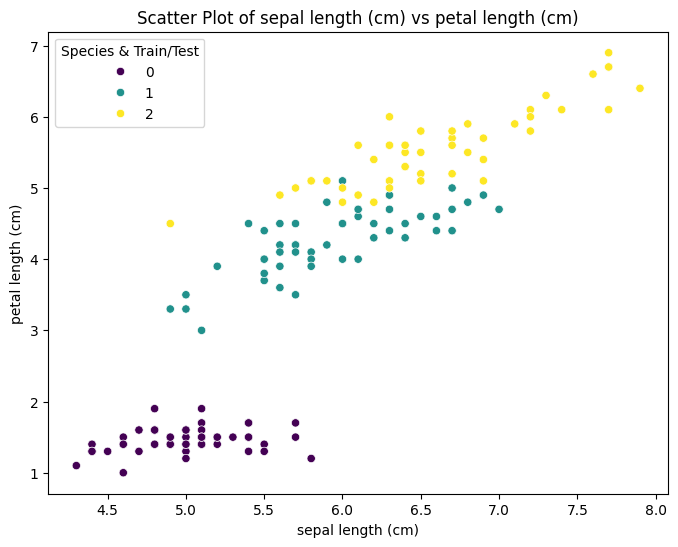

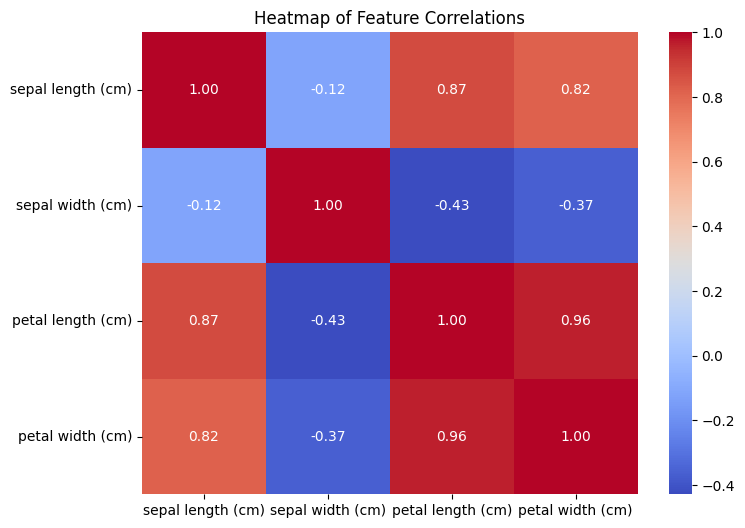

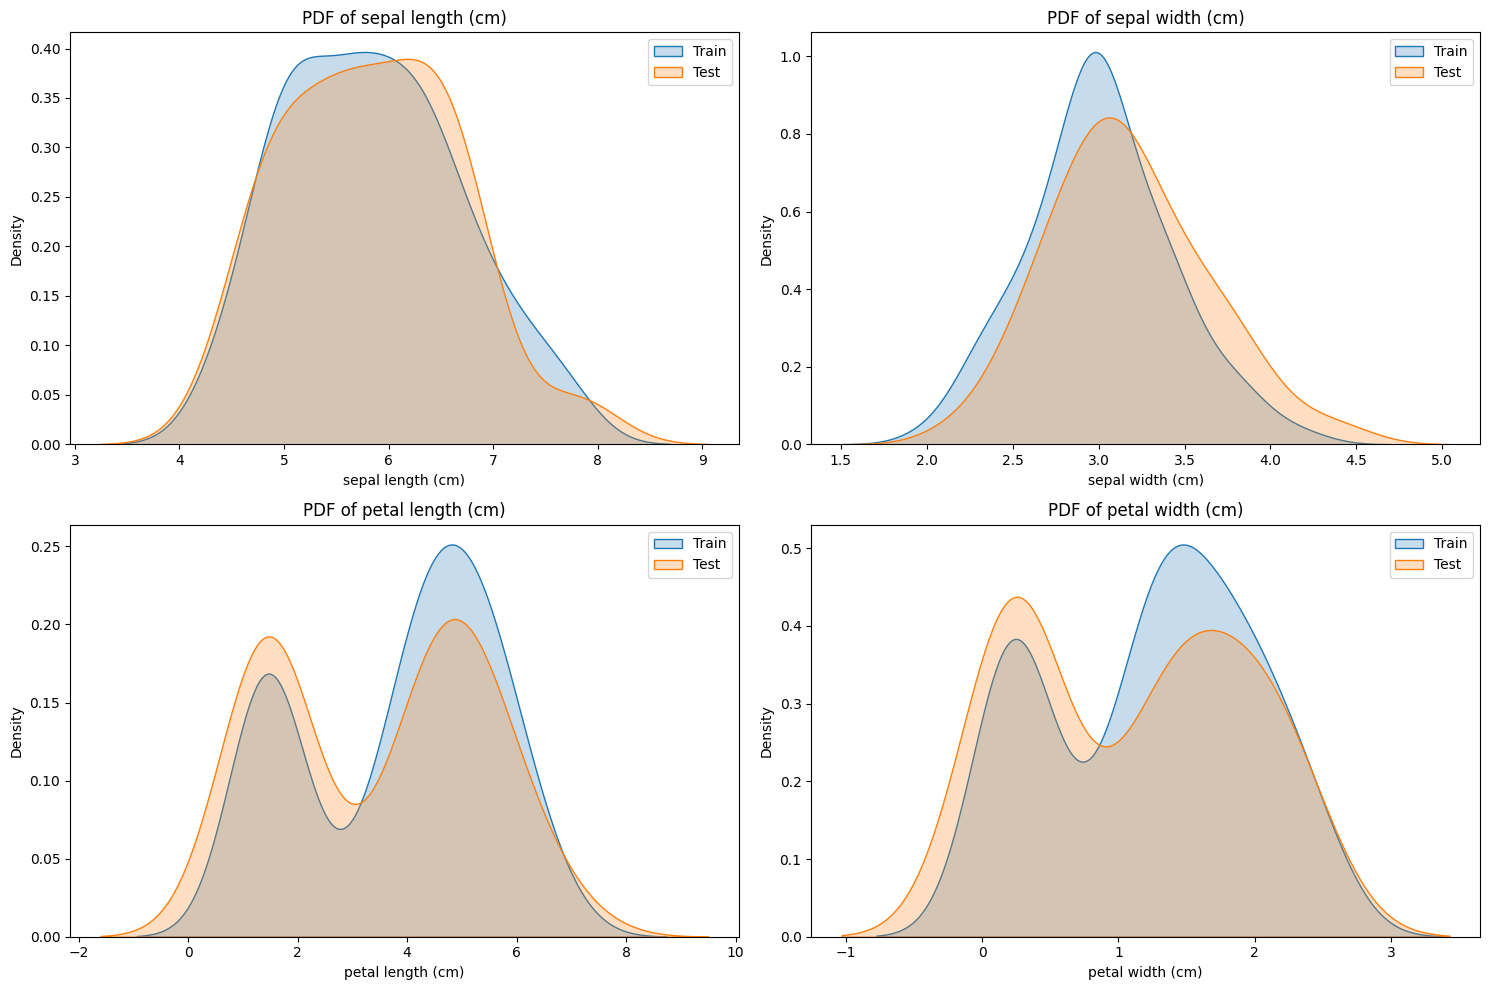

     sepal length (cm) sepal_length_category
0                  5.1                 متوسط
1                  4.9                 کوتاه
2                  4.7                 کوتاه
3                  4.6                 کوتاه
4                  5.0                 کوتاه
..                 ...                   ...
145                6.7                  بلند
146                6.3                  بلند
147                6.5                  بلند
148                6.2                  بلند
149                5.9                 متوسط

[150 rows x 2 columns]
Setosa features:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000     

In [ ]:
#mini_project0_section2
#Mohammad Sefid 40206864
#Erfan Majidi 40211034

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3.2_A
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
print(df.columns)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['species'], test_size=0.3, random_state=42)
X_train['species'] = y_train
X_test['species'] = y_test
X_train['train_test'] = 'train'
X_test['train_test'] = 'test'
final_df = pd.concat([X_train, X_test])
print(final_df)

# 3.2_B
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x=feature1, y=feature2, hue='species', palette='viridis')
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Species & Train/Test')
plt.show()

feature1 = 'sepal length (cm)'
feature2 = 'sepal width (cm)'
feature3 = 'petal length (cm)'
fig = px.scatter_3d(final_df, x=feature1, y=feature2, z=feature3, color='species', symbol='train_test',
title=f'3D Scatter Plot of {feature1}, {feature2}, {feature3}')
fig.show()

corr_matrix = final_df.iloc[:, :-2].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=X_train, x=feature, label='Train', fill=True)
    sns.kdeplot(data=X_test, x=feature, label='Test', fill=True)
    plt.title(f'PDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

# 3.2_C
feature = 'sepal length (cm)'
bins = [4, 5, 6, 8]
labels = ['کوتاه', 'متوسط', 'بلند']
df['sepal_length_category'] = pd.cut(df[feature], bins=bins, labels=labels)
print(df[['sepal length (cm)', 'sepal_length_category']])

# 3.2_D
df['species'] = iris.target
setosa_df = df[df['species'] == 0]
setosa_df = setosa_df.drop(columns=['species'])
setosa_stats = setosa_df.describe()
print("Setosa features:")
print(setosa_stats)